# Dependencies

In [1]:
#Standard dependencies
import pandas as pd 
import numpy as np
import os
from scipy import stats

from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import BayesianRidge
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.preprocessing import MinMaxScaler

#Custom dependencies 
import utils as utils
import analyze as az
import ml as ml

# Data

In [2]:
#Initialize
analysis = az.Analysis()

In [3]:
#Iterate over dataset files, read in and clean
folder_path = 'data/'
df_list = []

for filename in os.listdir(folder_path):
    #Read in df
    df = pd.read_csv(folder_path+filename)
    #Clean
    clean_df, binary_cols = analysis.wrangle_data(df)
    #Append to df list
    df_list.append(clean_df)

#Assign each df a variable
student = df_list[0]
dsm = df_list[1]
synthetic = df_list[2]

In [4]:
student.head()

,gender,age,academic_pressure,study_satisfaction,sleep_duration,dietary_habits,have_you_ever_had_suicidal_thoughts_,study_hours,financial_stress,family_history_of_mental_illness,depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,1,9,2,1,0
1,Male,28,4.0,5.0,5-6 hours,Healthy,1,7,1,1,0
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,1,10,4,0,1
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,1,7,2,1,0
4,Female,31,1.0,5.0,More than 8 hours,Healthy,1,4,2,1,0


In [5]:
dsm.head()

,id,inflated_self_esteem,distractibility,increase_in_goal_directed_activity,excessive_involvement_in_activities_with_high_potential_for_painful_consequences,racing_thoughts,decreased_need_for_sleep,more_talkative_than_usual,disorganized_thinking_or_speech,intrusive_memories_or_flashbacks,...,sleep_disturbance1,more_than_one_month_of_disturbance,the_disturbance_causes_clinically_significant_distress,the_disturbance_is_not_substance_induced,intrusive_memories_or_flashback,bipolar_disorder,schizophrenia,depression,anxiety_disorder,ptsd
0,1,0,1,1,0,1,1,0,0,1,...,1,0,0,0,0,1,1,1,1,0
1,2,0,1,0,0,1,1,1,0,0,...,1,1,0,0,1,1,1,0,0,0
2,3,1,0,1,0,0,0,0,1,0,...,1,1,1,1,1,0,1,1,0,1
3,4,0,0,1,0,0,1,1,0,1,...,0,0,1,1,1,1,0,0,0,0
4,5,1,1,0,0,1,1,1,0,0,...,0,1,0,1,0,1,1,0,1,0


In [6]:
synthetic.head()

,user_id,age,gender,symptoms,duration_weeks,previous_diagnosis,therapy_history,medication,diagnosis__condition,suggested_therapy,self_care_advice,urgency_level,mood,stress_level
0,586,43,Other,feeling anxious,29,OCD,1,0,Panic Disorder,Support Groups,Talk to a Friend,Moderate,7,1
1,708,40,Female,excessive worry,37,None,1,1,Depression,Cognitive Behavioral Therapy,Journaling,High,8,4
2,355,50,Non-binary,trouble sleeping,47,PTSD,0,1,Anxiety,Psychotherapy,Take Breaks,High,1,5
3,982,68,Non-binary,loss of interest in activities,35,Bipolar Disorder,0,0,Burnout,Mindfulness-Based Therapy,Exercise,Moderate,3,2
4,244,46,Other,panic attacks,22,None,0,0,Anxiety,Support Groups,Breathing Exercises,Low,1,6


# OHE 

In [7]:
#Drop response columns and apply ohe
X_student = student.drop(columns='depression')
X_dsm = dsm.drop(columns = ['id', 'bipolar_disorder', 'schizophrenia', 'depression', 'anxiety_disorder', 'ptsd'])
X_synthetic = synthetic.drop(columns = ['diagnosis__condition','suggested_therapy', 'user_id'])

#OHE
student_ohe = analysis.run_ohe(X_student)
dsm_ohe = X_dsm
synthetic_ohe = analysis.run_ohe(X_synthetic)

# EDA

## Pearson Correlation

In [9]:
#Student 
student.select_dtypes(include=np.number).drop(columns=['have_you_ever_had_suicidal_thoughts_', 
                                                        'family_history_of_mental_illness',
                                                        'depression']).corr()

,age,academic_pressure,study_satisfaction,study_hours,financial_stress
age,1.000000,0.027132,-0.005093,0.050112,-0.095348
academic_pressure,0.027132,1.000000,-0.101571,0.053024,0.003168
study_satisfaction,-0.005093,-0.101571,1.000000,-0.014122,-0.038012
study_hours,0.050112,0.053024,-0.014122,1.000000,0.015554
financial_stress,-0.095348,0.003168,-0.038012,0.015554,1.000000


In [10]:
#Synthetic
synthetic.select_dtypes(include=np.number).drop(columns=['therapy_history', 'medication', 'user_id']).corr()

,age,duration_weeks,mood,stress_level
age,1.000000,-0.002539,-0.008491,-0.006157
duration_weeks,-0.002539,1.000000,0.022438,0.003379
mood,-0.008491,0.022438,1.000000,-0.055536
stress_level,-0.006157,0.003379,-0.055536,1.000000


## Matthew's - Binary Relationships

In [11]:
#Student 
binary_student = student_ohe.drop(columns=['age', 'academic_pressure', 'study_satisfaction', 'study_hours', 'financial_stress'])
#Synthetic 
binary_synthetic = synthetic_ohe.drop(columns=['age', 'duration_weeks', 'mood', 'stress_level'])

In [12]:
#Matthew's corr - student
analysis.matthews_df(binary_student)

,have_you_ever_had_suicidal_thoughts_,family_history_of_mental_illness,gender_Female,gender_Male,sleep_duration_5-6 hours,sleep_duration_7-8 hours,sleep_duration_Less than 5 hours,sleep_duration_More than 8 hours,dietary_habits_Healthy,dietary_habits_Moderate,dietary_habits_Unhealthy
index,,,,,,,,,,,
have_you_ever_had_suicidal_thoughts_,1.000000,-0.005981,-0.053635,0.053635,-0.025075,0.070478,-0.025075,-0.020990,-0.046007,-0.017503,0.063019
family_history_of_mental_illness,-0.005981,1.000000,0.008427,-0.008427,-0.009924,0.032681,0.045741,-0.068025,0.051209,-0.035340,-0.015088
gender_Female,-0.053635,0.008427,1.000000,-1.000000,-0.014663,0.083166,-0.023945,-0.045068,0.090932,0.037703,-0.127678
gender_Male,0.053635,-0.008427,-1.000000,1.000000,0.014663,-0.083166,0.023945,0.045068,-0.090932,-0.037703,0.127678
sleep_duration_5-6 hours,-0.025075,-0.009924,-0.014663,0.014663,1.000000,-0.333275,-0.324538,-0.333275,0.124551,-0.011159,-0.111812
sleep_duration_7-8 hours,0.070478,0.032681,0.083166,-0.083166,-0.333275,1.000000,-0.333275,-0.342246,-0.039675,0.001381,0.037800
sleep_duration_Less than 5 hours,-0.025075,0.045741,-0.023945,0.023945,-0.324538,-0.333275,1.000000,-0.333275,0.015398,0.027878,-0.043206
sleep_duration_More than 8 hours,-0.020990,-0.068025,-0.045068,0.045068,-0.333275,-0.342246,-0.333275,1.000000,-0.098427,-0.017879,0.115173
dietary_habits_Healthy,-0.046007,0.051209,0.090932,-0.090932,0.124551,-0.039675,0.015398,-0.098427,1.000000,-0.496070,-0.489505


In [13]:
#Matthew's corr
analysis.matthews_df(binary_synthetic)

,therapy_history,medication,gender_Female,gender_Male,gender_Non-binary,gender_Other,symptoms_excessive worry,symptoms_feeling anxious,symptoms_feeling irritable,symptoms_feeling overwhelmed,...,self_care_advice_Breathing Exercises,self_care_advice_Exercise,self_care_advice_Journaling,self_care_advice_Meditation,self_care_advice_Take Breaks,self_care_advice_Talk to a Friend,urgency_level_Critical,urgency_level_High,urgency_level_Low,urgency_level_Moderate
index,,,,,,,,,,,,,,,,,,,,,
therapy_history,1.000000,-0.120912,-0.015692,0.010857,0.002017,0.003543,-0.011231,-0.027010,0.006525,-0.011650,...,0.012123,0.008758,-0.030742,0.010017,0.004371,-0.002981,-0.002249,0.048853,-0.017508,-0.029910
medication,-0.120912,1.000000,-0.006980,-0.008179,0.008997,0.005550,-0.006631,-0.001268,0.017504,0.011300,...,0.012830,-0.005189,0.007017,-0.008584,0.016834,-0.024176,0.010516,0.019254,-0.031628,0.000737
gender_Female,-0.015692,-0.006980,1.000000,-0.309196,-0.360138,-0.349520,-0.010439,0.022392,-0.019277,0.018244,...,-0.020761,0.010828,-0.023319,0.003819,-0.009866,0.039444,-0.014535,-0.003448,-0.016240,0.031220
gender_Male,0.010857,-0.008179,-0.309196,1.000000,-0.315615,-0.306310,0.006970,-0.009064,0.068788,-0.034950,...,-0.002009,-0.004569,-0.003550,0.014430,-0.002356,0.000390,0.019692,-0.047857,0.039289,-0.006573
gender_Non-binary,0.002017,0.008997,-0.360138,-0.315615,1.000000,-0.356776,-0.015895,0.028620,0.002065,0.034233,...,0.007808,-0.002528,0.010124,0.001434,0.015543,-0.032263,-0.009139,0.018773,-0.003094,-0.007458
gender_Other,0.003543,0.005550,-0.349520,-0.306310,-0.356776,1.000000,0.020077,-0.043030,-0.047187,-0.020300,...,0.014819,-0.004032,0.016482,-0.018812,-0.003647,-0.007264,0.005419,0.029266,-0.017363,-0.017638
symptoms_excessive worry,-0.011231,-0.006631,-0.010439,0.006970,-0.015895,0.020077,1.000000,-0.111955,-0.120234,-0.121553,...,-0.010988,0.000816,0.025288,-0.004915,-0.001254,-0.009972,-0.006318,-0.002827,-0.006487,0.014350
symptoms_feeling anxious,-0.027010,-0.001268,0.022392,-0.009064,0.028620,-0.043030,-0.111955,1.000000,-0.091866,-0.092874,...,-0.022459,0.020921,-0.019584,0.013823,0.001876,0.006586,-0.008351,-0.029217,0.032921,0.005933
symptoms_feeling irritable,0.006525,0.017504,-0.019277,0.068788,0.002065,-0.047187,-0.120234,-0.091866,1.000000,-0.099742,...,-0.010077,0.013960,0.007978,0.025172,-0.007380,-0.026220,0.015638,-0.002731,0.001935,-0.013017


In [14]:
#Matthew's corr
analysis.matthews_df(dsm_ohe)

,inflated_self_esteem,distractibility,increase_in_goal_directed_activity,excessive_involvement_in_activities_with_high_potential_for_painful_consequences,racing_thoughts,decreased_need_for_sleep,more_talkative_than_usual,disorganized_thinking_or_speech,intrusive_memories_or_flashbacks,diminished_emotional_expression,...,angry_outburst,recklessness,hypervigilance,exaggerated_startle_response,concentration_issues,sleep_disturbance1,more_than_one_month_of_disturbance,the_disturbance_causes_clinically_significant_distress,the_disturbance_is_not_substance_induced,intrusive_memories_or_flashback
index,,,,,,,,,,,,,,,,,,,,,
inflated_self_esteem,1.000000,-0.009465,0.010314,0.005765,-0.000307,-0.047519,0.018265,-0.036320,-0.020093,0.007816,...,0.006167,-0.012380,0.016057,0.008293,-0.024216,0.010866,-0.012932,0.022372,0.014336,-0.001671
distractibility,-0.009465,1.000000,-0.025287,-0.037276,0.013430,-0.044769,-0.014788,0.022225,-0.017648,-0.025875,...,0.011274,0.001458,-0.008368,-0.013599,-0.026929,-0.010904,-0.000135,0.000909,-0.008504,0.018856
increase_in_goal_directed_activity,0.010314,-0.025287,1.000000,-0.001818,-0.007694,0.007138,0.013085,0.014633,0.011529,0.011463,...,0.000838,0.002372,0.029067,-0.008258,-0.000263,0.018914,0.006101,0.033419,-0.018872,0.008274
excessive_involvement_in_activities_with_high_potential_for_painful_consequences,0.005765,-0.037276,-0.001818,1.000000,0.025038,0.008749,-0.004227,-0.023534,0.025835,0.018874,...,-0.005922,-0.027233,-0.008448,0.023703,-0.000293,0.016827,0.005293,0.013394,-0.008684,0.007084
racing_thoughts,-0.000307,0.013430,-0.007694,0.025038,1.000000,-0.012186,-0.002560,0.012124,0.017999,-0.012558,...,-0.017020,-0.023564,0.015591,-0.003476,-0.008280,-0.000773,0.029210,0.010943,-0.024019,-0.008340
decreased_need_for_sleep,-0.047519,-0.044769,0.007138,0.008749,-0.012186,1.000000,-0.013849,-0.024482,0.021210,-0.003940,...,0.023052,-0.003730,0.006357,0.012546,0.006696,-0.000845,0.013849,-0.013237,0.039700,0.014262
more_talkative_than_usual,0.018265,-0.014788,0.013085,-0.004227,-0.002560,-0.013849,1.000000,0.017961,-0.001654,-0.024809,...,-0.026037,-0.003872,-0.000906,-0.000809,-0.026929,-0.024760,0.007326,0.014775,-0.015967,0.009263
disorganized_thinking_or_speech,-0.036320,0.022225,0.014633,-0.023534,0.012124,-0.024482,0.017961,1.000000,-0.004804,-0.009304,...,0.013210,-0.022753,0.004084,0.006136,-0.008248,0.019435,-0.033950,-0.021253,-0.011797,0.001385
intrusive_memories_or_flashbacks,-0.020093,-0.017648,0.011529,0.025835,0.017999,0.021210,-0.001654,-0.004804,1.000000,-0.000867,...,0.023272,0.017100,-0.000528,0.012506,-0.000837,0.018445,0.000587,-0.002371,0.010875,-0.009486


## Mutual Information

In [15]:
#Student
analysis.mutual_information(student_ohe)

c:\Users\Andrew\anaconda3\envs\conda_ml\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
c:\Users\Andrew\anaconda3\envs\conda_ml\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
c:\Users\Andrew\anaconda3\envs\conda_ml\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
c:\Users\Andrew\anaconda3\envs\conda_ml\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and

,age,academic_pressure,study_satisfaction,have_you_ever_had_suicidal_thoughts_,study_hours,financial_stress,family_history_of_mental_illness,gender_Female,gender_Male,sleep_duration_5-6 hours,sleep_duration_7-8 hours,sleep_duration_Less than 5 hours,sleep_duration_More than 8 hours,dietary_habits_Healthy,dietary_habits_Moderate,dietary_habits_Unhealthy
index,,,,,,,,,,,,,,,,
age,2.816866,0.092620,0.074701,0.022406,0.222438,0.073041,0.016685,0.006050,0.006050,0.018068,1.150533e-02,0.009652,0.020213,0.012806,2.319793e-02,0.019441
academic_pressure,0.092620,1.601482,0.022923,0.005208,0.053565,0.015388,0.002438,0.001526,0.001526,0.002105,3.705508e-03,0.004485,0.000998,0.001149,2.433028e-03,0.006261
study_satisfaction,0.074701,0.022923,1.604793,0.000461,0.054864,0.016093,0.003533,0.001134,0.001134,0.000390,4.413720e-03,0.002986,0.000665,0.001046,3.508436e-03,0.004162
have_you_ever_had_suicidal_thoughts_,0.022406,0.005208,0.000461,0.692504,0.009045,0.003610,0.000018,0.001439,0.001439,0.000314,2.493008e-03,0.000314,0.000220,0.001058,1.531488e-04,0.001990
study_hours,0.222438,0.053565,0.054864,0.009045,2.551448,0.041451,0.009819,0.013844,0.013844,0.014978,8.144074e-03,0.005779,0.022741,0.008401,8.628070e-03,0.009127
financial_stress,0.073041,0.015388,0.016093,0.003610,0.041451,1.607914,0.004500,0.002063,0.002063,0.002383,2.206793e-03,0.007018,0.000973,0.003471,1.010015e-03,0.003663
family_history_of_mental_illness,0.016685,0.002438,0.003533,0.000018,0.009819,0.004500,0.691591,0.000036,0.000036,0.000049,5.335215e-04,0.001045,0.002324,0.001310,6.251866e-04,0.000114
gender_Female,0.006050,0.001526,0.001134,0.001439,0.013844,0.002063,0.000036,0.691114,0.691114,0.000108,3.453550e-03,0.000287,0.001019,0.004131,7.102328e-04,0.008216
gender_Male,0.006050,0.001526,0.001134,0.001439,0.013844,0.002063,0.000036,0.691114,0.691114,0.000108,3.453550e-03,0.000287,0.001019,0.004131,7.102328e-04,0.008216


In [16]:
#Synthetic
analysis.mutual_information(synthetic_ohe)

c:\Users\Andrew\anaconda3\envs\conda_ml\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
c:\Users\Andrew\anaconda3\envs\conda_ml\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
c:\Users\Andrew\anaconda3\envs\conda_ml\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
c:\Users\Andrew\anaconda3\envs\conda_ml\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and bin

,age,duration_weeks,therapy_history,medication,mood,stress_level,gender_Female,gender_Male,gender_Non-binary,gender_Other,...,self_care_advice_Breathing Exercises,self_care_advice_Exercise,self_care_advice_Journaling,self_care_advice_Meditation,self_care_advice_Take Breaks,self_care_advice_Talk to a Friend,urgency_level_Critical,urgency_level_High,urgency_level_Low,urgency_level_Moderate
index,,,,,,,,,,,,,,,,,,,,,
age,3.924022,0.303460,5.617363e-03,4.998562e-03,0.044113,0.045596,0.005906,6.962913e-03,0.005860,0.004212,...,7.698041e-03,6.352046e-03,6.073016e-03,5.755563e-03,4.530993e-03,4.528939e-03,4.592984e-03,4.416710e-03,6.228386e-03,6.544927e-03
duration_weeks,0.303460,3.897527,5.923985e-03,4.868687e-03,0.051646,0.048813,0.005021,4.642951e-03,0.003647,0.003624,...,4.359198e-03,5.281835e-03,4.742801e-03,4.444989e-03,4.487955e-03,3.714262e-03,6.230023e-03,5.456878e-03,9.146341e-03,1.275320e-02
therapy_history,0.005617,0.005924,6.863573e-01,7.333240e-03,0.000818,0.001264,0.000123,5.887159e-05,0.000002,0.000006,...,7.336949e-05,3.831399e-05,4.747849e-04,5.008582e-05,9.547602e-06,4.446315e-06,2.530764e-06,1.189711e-03,1.535566e-04,4.483949e-04
medication,0.004999,0.004869,7.333240e-03,6.926604e-01,0.000380,0.000953,0.000024,3.345583e-05,0.000040,0.000015,...,8.226963e-05,1.346468e-05,2.461582e-05,3.686549e-05,1.416414e-04,2.926003e-04,5.527512e-05,1.853029e-04,5.008269e-04,2.718292e-07
mood,0.044113,0.051646,8.176452e-04,3.795993e-04,2.290444,0.019858,0.000528,2.129981e-03,0.001676,0.000754,...,7.165867e-04,1.378914e-03,9.477354e-04,1.223253e-03,1.388929e-03,1.543955e-03,4.196434e-04,3.493587e-04,1.095144e-03,8.753073e-04
stress_level,0.045596,0.048813,1.264171e-03,9.526212e-04,0.019858,2.294190,0.001089,6.943410e-04,0.001400,0.000806,...,1.177206e-03,3.122227e-04,1.518877e-03,1.204591e-03,1.122098e-03,1.172142e-03,5.631909e-04,1.053758e-03,2.486691e-03,7.757473e-04
gender_Female,0.005906,0.005021,1.232889e-04,2.436157e-05,0.000528,0.001089,0.573892,7.410546e-02,0.097530,0.092463,...,2.185880e-04,5.826288e-05,2.760507e-04,7.268459e-06,4.895937e-05,7.603778e-04,1.064605e-04,5.952542e-06,1.329297e-04,4.826257e-04
gender_Male,0.006963,0.004643,5.887159e-05,3.345583e-05,0.002130,0.000694,0.074105,5.181657e-01,0.076845,0.072884,...,2.022254e-06,1.047566e-05,6.317700e-06,1.025113e-04,2.780521e-06,7.596814e-08,1.914121e-04,1.173684e-03,7.546225e-04,2.166097e-05
gender_Non-binary,0.005860,0.003647,2.034685e-06,4.046240e-05,0.001676,0.001400,0.097530,7.684529e-02,0.582062,0.095907,...,3.033544e-05,3.199541e-06,5.094972e-05,1.026666e-06,1.197630e-04,5.312707e-04,4.195913e-05,1.750985e-04,4.794130e-06,2.788022e-05


# Feature Engineering 

## Data Removal

In [8]:
#Randomly remove 30% of data
#Student
student_sparse = utils.random_nans(seed=5, df=student_ohe, perc=0.3)
#DSM
dsm_sparse = utils.random_nans(seed=5, df=dsm_ohe, perc=0.3)
#Synthetic
synthetic_sparse = utils.random_nans(seed=5, df=synthetic_ohe, perc=0.3)

In [9]:
#Example NaNs
student_sparse.isna().sum()

age                                     156
academic_pressure                       167
study_satisfaction                      153
have_you_ever_had_suicidal_thoughts_    166
study_hours                             150
financial_stress                        123
family_history_of_mental_illness        140
gender_Female                           163
gender_Male                             140
sleep_duration_5-6 hours                151
sleep_duration_7-8 hours                151
sleep_duration_Less than 5 hours        138
sleep_duration_More than 8 hours        146
dietary_habits_Healthy                  133
dietary_habits_Moderate                 159
dietary_habits_Unhealthy                141
dtype: int64

## Scaling

In [11]:
#MinMax scaler
minmax = MinMaxScaler()

#Student 
student_scaler = minmax.fit(student_sparse)
student_scaled = pd.DataFrame(student_scaler.transform(student_sparse), columns=student_sparse.columns, index=student_sparse.index)
# #DSM
# dsm_scaler = MinMaxScaler()
# dsm_scaled = pd.DataFrame(dsm_scaler.fit_transform(dsm_sparse), columns=dsm_sparse.columns, index=dsm_sparse.index)
# #Synthetic
# synthetic_scaler = MinMaxScaler()
# synthetic_scaled = pd.DataFrame(synthetic_scaler.fit_transform(synthetic_sparse), columns=synthetic_sparse.columns, index=synthetic_sparse.index)

# Imputation 

In [12]:
model = ml.ML()

In [13]:
#Discrete and continuous cols
student_continuous = ['age', 'academic_pressure', 'study_satisfaction',	'study_hours', 'financial_stress']
student_discrete = [col for col in student_scaled.columns if col not in student_continuous]

## KNN Imputer

In [14]:
#KNN Hyperparam tuning
knn_score, best_k = model.knn_imputer_tuning(kmin=1, kmax=50, step=1, 
                                        X_train=student_scaled, #X_test=X_ohe, 
                                        X_test=student_ohe,
                                        thresh=0.4,
                                        discrete_cols=student_discrete, continuous_cols=student_continuous,
                                        scaler=student_scaler, calc_total=True)

Performance metrics for k = 1:

Discrete Metrics:

F1 Score:0.5324881141045957
Accuracy Score = 0.6375921375921376
Recall = 0.5562913907284768
Precision = 0.5106382978723404
Confusion Matrix:
[[702 322]
 [268 336]]

Continuous Metrics:

age Metrics:
RMSE = 6.640976140791661
MAE = 5.217948717948718

academic_pressure Metrics:
RMSE = 1.9561051365888342
MAE = 1.5748502994011977

study_satisfaction Metrics:
RMSE = 2.0816659994661326
MAE = 1.6405228758169934

study_hours Metrics:
RMSE = 4.734976240700686
MAE = 3.993333333333333

financial_stress Metrics:
RMSE = 1.9422558337091527
MAE = 1.4796747967479675


Total Continuous:
RMSE = 4.004170055968672
MAE = 2.815754339118825

Best continuous k = 1 with rmse = 4.004170055968672
Performance metrics for k = 2:

Discrete Metrics:

F1 Score:0.5929260450160772
Accuracy Score = 0.6111793611793612
Recall = 0.7632450331125827
Precision = 0.48475289169295477
Confusion Matrix:
[[534 490]
 [143 461]]

Continuous Metrics:

age Metrics:
RMSE = 6.02811255913

In [15]:
print(f"Best F1 Score = {knn_score}")
print(f"Best k = {best_k}")

Best F1 Score = 0.7125091441111924
Best k = 47


In [16]:
#Eval best 
model.knn_imputer_tuning(kmin=47, kmax=48, step=1, 
                                        X_train=student_scaled, #X_test=X_ohe, 
                                        X_test=student_ohe,
                                        thresh=0.4,
                                        discrete_cols=student_discrete, continuous_cols=student_continuous,
                                        scaler=student_scaler, calc_total=True)

Performance metrics for k = 47:



Discrete Metrics:

F1 Score:0.7125091441111924
Accuracy Score = 0.7585995085995086
Recall = 0.8062913907284768
Precision = 0.6382699868938401
Confusion Matrix:
[[748 276]
 [117 487]]

Continuous Metrics:

age Metrics:
RMSE = 4.893558611098549
MAE = 4.21290234588107

academic_pressure Metrics:
RMSE = 1.4886717365112803
MAE = 1.2890814116447955

study_satisfaction Metrics:
RMSE = 1.4592714988497633
MAE = 1.2530941454596023

study_hours Metrics:
RMSE = 3.832935664088296
MAE = 3.3163120567375888

financial_stress Metrics:
RMSE = 1.3906563728360137
MAE = 1.188894654903996


Total Continuous:
RMSE = 3.0292755875144337
MAE = 2.28023179842627

Best continuous k = 47 with rmse = 3.0292755875144337


(0.7125091441111924, 47)

## Iterative Imputer

In [17]:
#Param grid
estimators = [BayesianRidge()]
inits = ['mean', 'most_frequent']
order = ['ascending', 'roman', 'random']
sps = [False]

In [18]:
ii_score, ii_params = model.mice_imputer_tuning(estimators, inits, order, sps, 
                          X_train=student_scaled, X_test=student_ohe, 
                          thresh=0.3, discrete_cols=student_discrete, 
                          continuous_cols=student_continuous, scaler=student_scaler, 
                          calc_total=True)

Discrete Metrics:

F1 Score:0.752895752895753
Accuracy Score = 0.7641277641277642
Recall = 0.9685430463576159
Precision = 0.6157894736842106
Confusion Matrix:
[[659 365]
 [ 19 585]]

Best discrete params = {'estimator': BayesianRidge(), 'initial_strategy': 'mean', 'imputation_order': 'ascending', 'sample_posterior': False} with f1 = 0.752895752895753
Continuous Metrics:

age Metrics:
RMSE = 4.957156514344155
MAE = 4.29527683744496

academic_pressure Metrics:
RMSE = 1.462745194763046
MAE = 1.2537754657397993

study_satisfaction Metrics:
RMSE = 1.431422807717203
MAE = 1.2289875936505639

study_hours Metrics:
RMSE = 3.8156217205751344
MAE = 3.326417009308946

financial_stress Metrics:
RMSE = 1.3806457755204693
MAE = 1.1605343746165335


Total Continuous:
RMSE = 3.0401334390250967
MAE = 2.2819587059047692

Best continuous params = {'estimator': BayesianRidge(), 'initial_strategy': 'mean', 'imputation_order': 'ascending', 'sample_posterior': False} with rmse = 3.0401334390250967
Discrete Me

In [19]:
print(f"Best F1 Score = {ii_score}")
print(f"Best params = {ii_params}")

Best F1 Score = 0.7529107373868046
Best params = {'estimator': BayesianRidge(), 'initial_strategy': 'mean', 'imputation_order': 'random', 'sample_posterior': False}


In [20]:
#Eval Best
model.mice_imputer_tuning([BayesianRidge()], inits=['mean'], order=['random'], sps=[False], 
                          X_train=student_scaled, X_test=student_ohe, 
                          thresh=0.3, discrete_cols=student_discrete, 
                          continuous_cols=student_continuous, scaler=student_scaler, 
                          calc_total=True)

Discrete Metrics:

F1 Score:0.7529107373868046
Accuracy Score = 0.7653562653562653
Recall = 0.9635761589403974
Precision = 0.6178343949044586
Confusion Matrix:
[[664 360]
 [ 22 582]]

Best discrete params = {'estimator': BayesianRidge(), 'initial_strategy': 'mean', 'imputation_order': 'random', 'sample_posterior': False} with f1 = 0.7529107373868046
Continuous Metrics:

age Metrics:
RMSE = 4.96171416479042
MAE = 4.286651169209167

academic_pressure Metrics:
RMSE = 1.465146766843763
MAE = 1.2562861859384822

study_satisfaction Metrics:
RMSE = 1.4314677785753747
MAE = 1.229049740521272

study_hours Metrics:
RMSE = 3.8160382516709834
MAE = 3.32650267624518

financial_stress Metrics:
RMSE = 1.3806837657716162
MAE = 1.1605747985275623


Total Continuous:
RMSE = 3.042051085211879
MAE = 2.280758461153242

Best continuous params = {'estimator': BayesianRidge(), 'initial_strategy': 'mean', 'imputation_order': 'random', 'sample_posterior': False} with rmse = 3.042051085211879


(0.7529107373868046,
 {'estimator': BayesianRidge(),
  'initial_strategy': 'mean',
  'imputation_order': 'random',
  'sample_posterior': False})

## SVT

In [21]:
#Param grid 
inits = ['mean', 'mode']
taus = list(range(1, 20))
deltas = [0.1, 0.5, 1, 1.5, 2]

In [22]:
svt_score, svt_params = model.svt_tuning(X_train=student_scaled, inits=inits, taus=taus, deltas=deltas,
                                           X_test=student_ohe, thresh=0.2, 
                                           discrete_cols=student_discrete, continuous_cols=student_continuous, 
                                           scaler=student_scaler,
                                           calc_total=True)


Performance metrics for init=mean; tau=1; delta=0.1

Converged in 96 iterations
Discrete Metrics:

F1 Score:0.7204574332909783
Accuracy Score = 0.7297297297297297
Recall = 0.9387417218543046
Precision = 0.5845360824742268
Confusion Matrix:
[[621 403]
 [ 37 567]]

Best discrete params = {'init': 'mean', 'tau': 1, 'delta': 0.1} 
with f1 = 0.7204574332909783
Continuous Metrics:

age Metrics:
RMSE = 5.37955146370007
MAE = 4.652692363411246

academic_pressure Metrics:
RMSE = 1.5846897955022017
MAE = 1.3786916973791739

study_satisfaction Metrics:
RMSE = 1.5396416892778042
MAE = 1.3322921207264045

study_hours Metrics:
RMSE = 4.029714450754147
MAE = 3.418822292575698

financial_stress Metrics:
RMSE = 1.4647567481968766
MAE = 1.239935838546431


Total Continuous:
RMSE = 3.2674150187082525
MAE = 2.436899424103047

Best continuous params = {'init': 'mean', 'tau': 1, 'delta': 0.1} 
with rmse = 3.2674150187082525

Performance metrics for init=mean; tau=1; delta=0.5

Converged in 87 iterations
Di

In [23]:
print(f"Best F1 Score = {svt_score}")
print(f"Best params = {svt_params}")

Best F1 Score = 0.7204574332909783
Best params = {'init': 'mean', 'tau': 1, 'delta': 0.1}


In [24]:
#Eval Best 
model.svt_tuning(X_train=student_scaled, inits=['mean'], taus=[1], deltas=[0.1],
                                           X_test=student_ohe, thresh=0.2, 
                                           discrete_cols=student_discrete, continuous_cols=student_continuous, 
                                           scaler=student_scaler,
                                           calc_total=True)


Performance metrics for init=mean; tau=1; delta=0.1

Converged in 96 iterations
Discrete Metrics:

F1 Score:0.7204574332909783
Accuracy Score = 0.7297297297297297
Recall = 0.9387417218543046
Precision = 0.5845360824742268
Confusion Matrix:
[[621 403]
 [ 37 567]]

Best discrete params = {'init': 'mean', 'tau': 1, 'delta': 0.1} 
with f1 = 0.7204574332909783
Continuous Metrics:

age Metrics:
RMSE = 5.37955146370007
MAE = 4.652692363411246

academic_pressure Metrics:
RMSE = 1.5846897955022017
MAE = 1.3786916973791739

study_satisfaction Metrics:
RMSE = 1.5396416892778042
MAE = 1.3322921207264045

study_hours Metrics:
RMSE = 4.029714450754147
MAE = 3.418822292575698

financial_stress Metrics:
RMSE = 1.4647567481968766
MAE = 1.239935838546431


Total Continuous:
RMSE = 3.2674150187082525
MAE = 2.436899424103047

Best continuous params = {'init': 'mean', 'tau': 1, 'delta': 0.1} 
with rmse = 3.2674150187082525


(0.7204574332909783, {'init': 'mean', 'tau': 1, 'delta': 0.1})

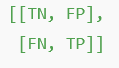

# Output Data

In [37]:
#KNN
k_imputer = KNNImputer(n_neighbors=best_k)
knn_continuous = pd.DataFrame(k_imputer.fit_transform(student_scaled), columns=student_scaled.columns, index=student_scaled.index)
knn_df = knn_continuous.copy()
for col in student_discrete:
    knn_df[col] = np.where(knn_df[col]>0.4, 1, 0)
#Reverse transform 
# knn_df = pd.DataFrame(student_scaler.inverse_transform(knn_df), columns=knn_df.columns, index=knn_df.index)
knn_df['response'] = student['depression']

knn_df.head()

,age,academic_pressure,study_satisfaction,have_you_ever_had_suicidal_thoughts_,study_hours,financial_stress,family_history_of_mental_illness,gender_Female,gender_Male,sleep_duration_5-6 hours,sleep_duration_7-8 hours,sleep_duration_Less than 5 hours,sleep_duration_More than 8 hours,dietary_habits_Healthy,dietary_habits_Moderate,dietary_habits_Unhealthy,response
0,0.527926,0.250000,0.425532,1,0.750000,0.250000,1,0,1,1,1,0,0,0,1,0,0
1,0.625000,0.462766,1.000000,1,0.583333,0.500000,1,0,1,0,1,0,0,0,0,0,0
2,0.437500,0.000000,0.500000,1,0.533688,0.750000,0,0,1,1,0,0,0,0,0,1,1
3,0.312500,0.000000,0.750000,1,0.455674,0.457447,1,0,1,0,0,0,1,0,0,1,0
4,0.812500,0.585106,1.000000,0,0.333333,0.250000,0,1,0,0,0,0,1,1,0,0,0


In [38]:
#IterativeImputer 
mice = IterativeImputer(max_iter=100, min_value=0, max_value=1, **ii_params)
mice_continuous = pd.DataFrame(mice.fit_transform(student_scaled), columns=student_scaled.columns, index=student_scaled.index)
#Round
mice_df = mice_continuous.copy()
for col in student_discrete:
    mice_df[col] = np.where(mice_df[col]>0.3, 1, 0)
#Reverse transform
# mice_df = pd.DataFrame(student_scaler.inverse_transform(mice_df), columns=mice_df.columns, index=mice_df.index)
#Add response column back
mice_df['response'] = student['depression']

mice_df.head()

,age,academic_pressure,study_satisfaction,have_you_ever_had_suicidal_thoughts_,study_hours,financial_stress,family_history_of_mental_illness,gender_Female,gender_Male,sleep_duration_5-6 hours,sleep_duration_7-8 hours,sleep_duration_Less than 5 hours,sleep_duration_More than 8 hours,dietary_habits_Healthy,dietary_habits_Moderate,dietary_habits_Unhealthy,response
0,0.555989,0.250000,0.520660,1,0.750000,0.250000,1,0,1,1,0,0,0,0,1,0,0
1,0.625000,0.502409,1.000000,1,0.583333,0.488561,1,0,1,1,1,0,0,1,1,1,0
2,0.437500,0.000000,0.519847,1,0.539942,0.750000,0,0,1,1,0,0,0,0,0,1,1
3,0.312500,0.000000,0.750000,1,0.524101,0.489605,1,0,1,0,0,0,1,0,0,1,0
4,0.812500,0.522107,1.000000,1,0.333333,0.250000,1,1,0,0,0,0,1,1,0,0,0


In [39]:
#SVT
X = model.singular_value_thresholding(M=np.array(student_scaled), max_iter=100000, tol=1e-5, **svt_params)
#Convert numpy array to dataframe
svt_continuous = pd.DataFrame(X, columns=student_scaled.columns, index=student_scaled.index)
#Round
svt_df = svt_continuous.copy()
#Apply rounding for binary vals
for col in student_discrete:
    svt_df[col] = np.where(svt_df[col]>0.2, 1, 0)
#Reverse transform 
# svt_df = pd.DataFrame(student_scaler.inverse_transform(svt_df), columns=svt_df.columns, index=svt_df.index)
svt_df['response'] = student['depression']

svt_df.head()

Converged in 96 iterations


,age,academic_pressure,study_satisfaction,have_you_ever_had_suicidal_thoughts_,study_hours,financial_stress,family_history_of_mental_illness,gender_Female,gender_Male,sleep_duration_5-6 hours,sleep_duration_7-8 hours,sleep_duration_Less than 5 hours,sleep_duration_More than 8 hours,dietary_habits_Healthy,dietary_habits_Moderate,dietary_habits_Unhealthy,response
0,0.442067,0.250000,0.430796,1,0.750000,0.250000,1,0,1,1,1,0,0,0,1,0,0
1,0.625000,0.461449,1.000000,1,0.583333,0.439507,1,0,1,1,1,0,0,1,1,1,0
2,0.437500,0.000000,0.371497,1,0.411473,0.750000,0,0,1,1,0,0,0,0,0,1,1
3,0.312500,0.000000,0.750000,1,0.326868,0.402916,1,0,1,0,0,0,1,0,0,1,0
4,0.812500,0.462853,1.000000,1,0.333333,0.250000,1,1,0,0,0,0,1,1,0,0,0


In [40]:
#Scale original df and add response column back
scaler = MinMaxScaler()
original_scaled = pd.DataFrame(scaler.fit_transform(student_ohe), columns=student_ohe.columns, index=student_ohe.index)
original_scaled['response'] = student['depression']
# student_ohe['response'] = student['depression']

In [41]:
#Output to csv
original_scaled.to_csv('data_output/original_student.csv', index=False)
# student_ohe.to_csv('data_output/original_student.csv', index=False)
#knn
knn_df.to_csv('data_output/knn_student.csv', index=False)
#mice
mice_df.to_csv('data_output/mice_student.csv', index=False)
#svt
svt_df.to_csv('data_output/svt_student.csv', index=False)